In [ ]:
%%html
<style>
table {display: block;}
td {
  font-size: 20px
}
.rendered_html { font-size: 20px; }
*{ line-height: 200%; }
</style>
<style type="text/css" media="print"> body { -webkit-print-color-adjust: exact; } </style>

# Natural Language Processing and the Web WS 2024/25 - Practice Class - <span style="color:blue">Week 03</span>

We have seen in the previous practice classes how to access text data and tokenization issues. In this section, we will cover the following topics: 
## Contents
* <span style="color:blue">Parsing and Chunking</span> text documents 
* How to use stanford's <span style="color:blue">Stanza</span> library for NLP preprocessing pipeline
* Description of building small Ontology using <span style="color:blue">Hearst Pattern</span> (Excercise)

## Parsing vs. chunking 


**Syntactic Parsing** is the process of analyzing a text to determine its <span style="color:blue">grammatical structure</span> with respect to a specified grammar. It goes beyond part-of-speech tagging (though that is often a first step) to understand sentence boundaries and word relationships. Two most common types are as follows:

**Constituency Parsing** Part of developing a grammar involves building an inventory of the
constituents in the language. How do words group together in English? Consider
a noun phrase, a sequence of words surrounding at least one noun. Constituency Parsing builds a parse tree by grouping words within sentences into <span style="color:blue">hierarchical grammatical structures (contituents)</span>, such as noun phrases, verb phraes, prepositional phrases etc. Read more [here](https://web.stanford.edu/~jurafsky/slp3/18.pdf).

Here is a possible parse tree for the example sentence "<span style="color:blue">A dog had seen the cutest ferrets.</span>"

![parse.png](parse.png)

A different parse using stanford corenlp
![consparse.png](consparse.png)

**Dependency Parsing:**

In <span style="color:blue">dependency parsing</span> the syntactic structure of a sentence is described solely in terms of directed <span style="color:blue">binary grammatical relations between the words</span>. Relations among the words are illustrated above the sentence with <span style="color:blue">directed, labeled arcs</span> from <span style="color:blue">heads</span> to <span style="color:blue">dependents</span>. It focus on word relationships such as subject-verb-object tripples.

We call this a **typed dependency structure** because in typed dependency the labels are drawn from a fixed inventory of grammatical relations. A <span style="color:blue">root</span> node explicitly marks the root of the tree, the head of the entire structure. Read more [here](https://web.stanford.edu/~jurafsky/slp3/19.pdf)


![depparse.png](depparse.png)

Source: https://corenlp.run/

### Chunking

Proper parsing is a hard problem in computational linguistics. While identifying some sort of sentence structure is important for many NLP applications, not all of them require something as detailed and complicated as a parse tree. <span style="color:blue">Chunking</span>, also known as <span style="color:blue">shallow parsing</span>, is a simplified form of sentence analysis which identifies basic constituents (noun phrases, verb phrases, etc.) but does not specify their internal structure.
For the POS-tagged sentence example above, a chunker might identify noun chunks (<span style="color:blue">NC</span>) and verb complexes (<span style="color:blue">VC</span>) as follows:
![chunk.png](chunk.png)

## Chunking with NLTK
Chunking works on top of POS tagging, it uses pos-tags as input and provides chunks as output. 

We can create <span style="color:blue">rules</span> to create <span style="color:blue">noun phrase</span>, for example, we can define noun phrase chunking as an optional determiner (<span style="color:blue">DT</span>) followed by any number of adjectives (<span style="color:blue">JJ</span>) and then a noun (<span style="color:blue">NN</span>).

In [2]:
HR='\033[91m' # hilight in red
HD ='\x1b[0m'# hilight in default

In [3]:
import nltk
sentence = "the little yellow dog barked at the cat."
#Define your grammar using regular expressions
grammar = ("NP: {<DT>?<JJ>*<NN>} # NP")

chunkParser = nltk.RegexpParser(grammar)
postags = nltk.pos_tag(nltk.word_tokenize(sentence))

for word, pos in postags:
    print(word +" " + HR+ pos + HD)

print("Chunking Results")
tree = chunkParser.parse(postags)
for subtree in tree.subtrees():
    print(subtree)
tree.draw()

the DT
little JJ
yellow JJ
dog NN
barked VBD
at IN
the DT
cat NN
. .
Chunking Results
(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN)
  ./.)
(NP the/DT little/JJ yellow/JJ dog/NN)
(NP the/DT cat/NN)


The above code will draw the parsed tree structure (with chunk labels) of the sentence. It should look like the following
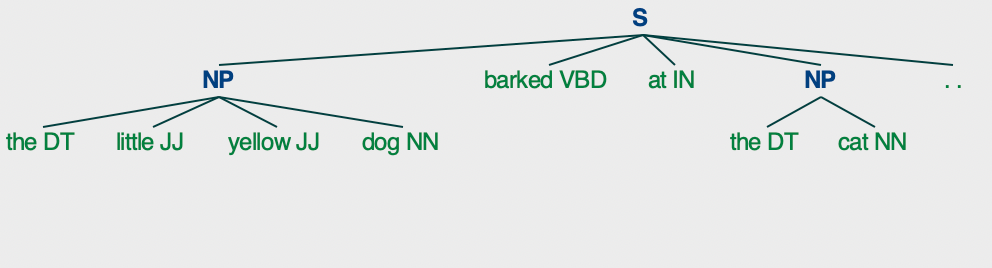

In [ ]:
import nltk
# another noun-chunk pattern
# 1) DT or PP$ followed by JJ and end by NN or
# 2) a number of proper noun sequences NNP+
grammar = r"""
  NP: {<DT|PRP\$>?<JJ>*<NN>}   # chunk determiner/possessive, adjectives and noun
      {<NNP>+}                # chunk sequences of proper nouns
"""
cp = nltk.RegexpParser(grammar)
sentence = "Rapunzel let down her long golden hair."
postags = nltk.pos_tag(nltk.word_tokenize(sentence))
tree = cp.parse(postags)
print(tree)
tree.draw()

(S
  (NP Rapunzel/NNP)
  let/VBD
  down/RP
  (NP her/PRP$ long/JJ golden/JJ hair/NN)
  ./.)


2024-10-30 10:59:43.096 python[23827:42440665] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-30 10:59:43.096 python[23827:42440665] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


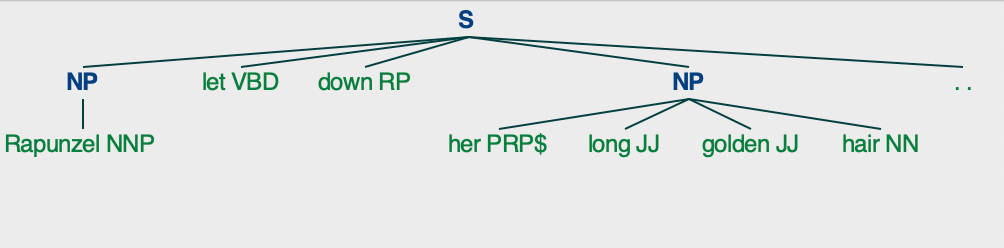

In [ ]:
# List verb chunks from the brown corpus
cp = nltk.RegexpParser('VP: {<V.*> <TO> <V.*>}')
brown = nltk.corpus.brown
verbchunks = []
for sent in brown.tagged_sents():
    tree = cp.parse(sent)
    for subtree in tree.subtrees():
        if subtree.label() == 'VP':
            verbchunks.append(subtree)
# print the first ten chunks
print(verbchunks[:10])
# draw the first Verb-chunk
verbchunks[0].draw()

[Tree('VP', [('combined', 'VBN'), ('to', 'TO'), ('achieve', 'VB')]), Tree('VP', [('continue', 'VB'), ('to', 'TO'), ('place', 'VB')]), Tree('VP', [('serve', 'VB'), ('to', 'TO'), ('protect', 'VB')]), Tree('VP', [('wanted', 'VBD'), ('to', 'TO'), ('wait', 'VB')]), Tree('VP', [('allowed', 'VBN'), ('to', 'TO'), ('place', 'VB')]), Tree('VP', [('expected', 'VBN'), ('to', 'TO'), ('become', 'VB')]), Tree('VP', [('expected', 'VBN'), ('to', 'TO'), ('approve', 'VB')]), Tree('VP', [('expected', 'VBN'), ('to', 'TO'), ('make', 'VB')]), Tree('VP', [('intends', 'VBZ'), ('to', 'TO'), ('make', 'VB')]), Tree('VP', [('seek', 'VB'), ('to', 'TO'), ('set', 'VB')])]


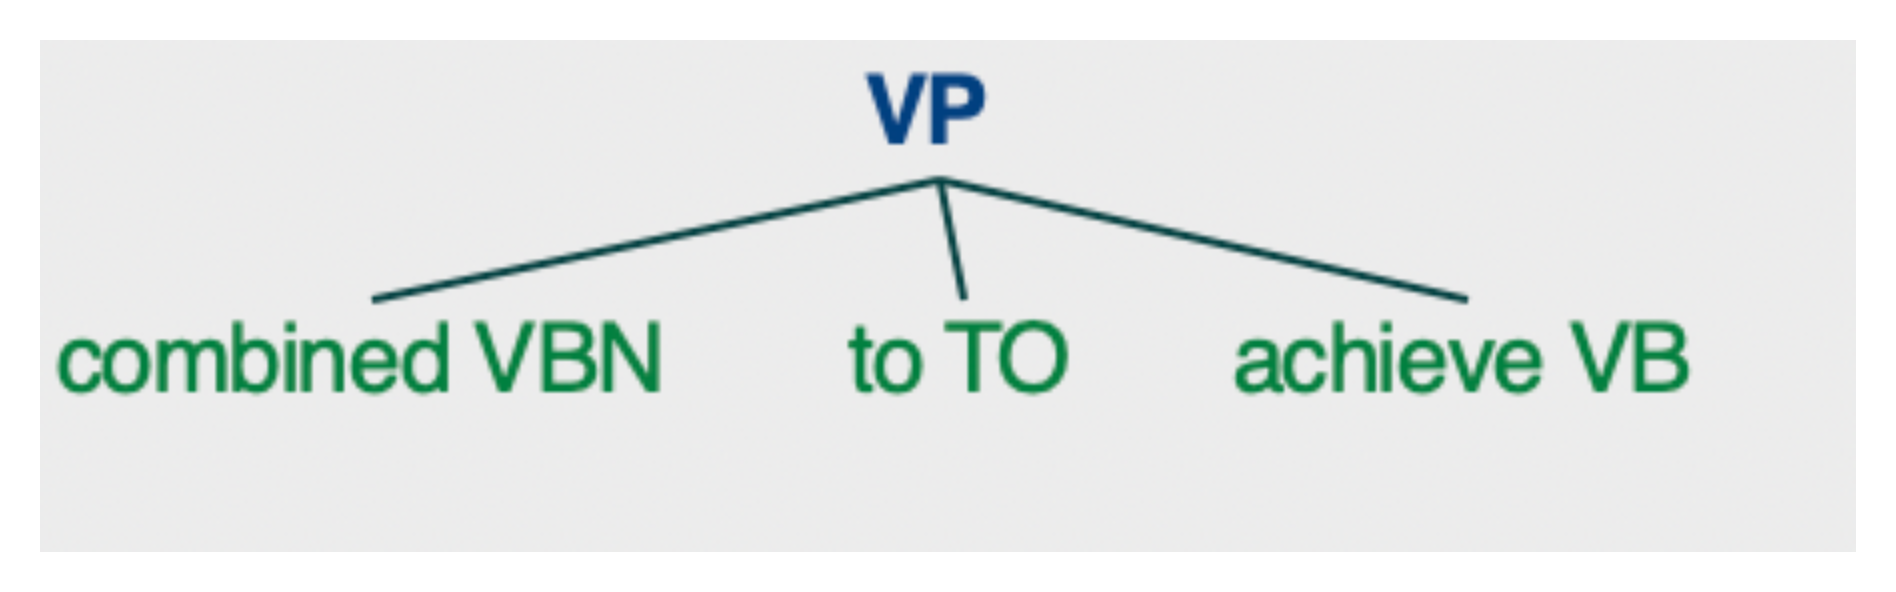

## Parsing and Chunking with spaCy

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp("The cat and the dog sleep in the basket near the door.")
for i, word in enumerate(doc):
    print("{:12s}\t{:12s}\t{:6s}\t{:12s}\t{:12s}".format(\
              word.text, word.lemma_, word.pos_, word.head.text, word.dep_))
    print("")

The         	the         	DET   	cat         	det         

cat         	cat         	NOUN  	cat         	ROOT        

and         	and         	CCONJ 	cat         	cc          

the         	the         	DET   	sleep       	det         

dog         	dog         	NOUN  	sleep       	compound    

sleep       	sleep       	NOUN  	cat         	conj        

in          	in          	ADP   	sleep       	prep        

the         	the         	DET   	basket      	det         

basket      	basket      	NOUN  	in          	pobj        

near        	near        	ADP   	sleep       	prep        

the         	the         	DET   	door        	det         

door        	door        	NOUN  	near        	pobj        

.           	.           	PUNCT 	cat         	punct       



### Visualization of dep parse using displaCy
You can view dependency parsing visually using displaCY visualizers.


In [7]:
#Dependency parsing with spaCy
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(u"The cat and the dog sleep in the basket near the door.")
displacy.render(doc, style='dep')

displaCy display options can be adjusted
for dependency visualizer options, see the details: https://spacy.io/api/top-level#displacy_options

In [8]:
options = {"compact": True, "color": "blue", "add_lemma":True}
displacy.render(doc, style='dep', options=options)

In [ ]:
options = {"compact": True, "color": "blue", "collapse_phrases":True}
# collapse_phrases: Merge noun phrases into one token
displacy.render(doc, style='dep', options=options)

## Noun chunks in spaCy
You can extract base noun phrases in the document.  A base noun phrase, or “NP chunk”, is a noun phrase that does not permit other NPs to be nested within it

In [10]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u'The cat and the dog sleep in the basket near the door.')
for chunk in doc.noun_chunks:
    print("{:12s}\t{:12s}\t{:6s}\t{:12s}".format(\
            chunk.text, chunk.root.text, chunk.root.dep_,chunk.root.head.text))

The cat     	cat         	ROOT  	cat         
the dog sleep	sleep       	conj  	cat         
the basket  	basket      	pobj  	in          
the door    	door        	pobj  	near        


In [11]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Autonomous cars shift insurance liability toward manufacturers")
for chunk in doc.noun_chunks:
    print("{:20s}\t{:20s}\t{:6s}\t{:12s}".format(\
            chunk.text, chunk.root.text, chunk.root.dep_,chunk.root.head.text))

Autonomous cars     	cars                	nsubj 	shift       
insurance liability 	liability           	dobj  	shift       
manufacturers       	manufacturers       	pobj  	toward      


### Constituency parsing
For constituency parsing with spaCy, you can use a third party extensions and pipleines like [Berkeley Neural Parser](https://spacy.io/universe/project/self-attentive-parser/) and [Treelib](https://github.com/Halvani/Constituent-Treelib)

## Parsing with Stanza 
Adapted from (https://colab.research.google.com/github/stanfordnlp/stanza/blob/main/demo/Stanza_Beginners_Guide.ipynb#)
Stanza is a Python NLP toolkit that supports 60+ human languages. It is built with highly accurate neural network components that enable efficient training and evaluation with your own annotated data, and offers pretrained models on 100 treebanks. Additionally, Stanza provides a stable, officially maintained Python interface to Java Stanford CoreNLP Toolkit.
You can download models with the stanza.download command. The language can be specified with either a full language name (e.g., "english"), or a short code (e.g., "en").

### installation
> pip install stanza

### Downloading models
You can download models with the stanza.download command. The language can be specified with either a full language name (e.g., "english"), or a short code (e.g., "en").
You can download models with the stanza.download command. The language can be specified with either a full language name (e.g., "english"), or a short code (e.g., "en").


>```Python
import stanza
stanza.download('en')
>```

In [12]:
!pip install stanza

In [13]:
import stanza
stanza.download('en')
stanza.download('de')

2024-10-30 10:59:51 INFO: Downloaded file to /Users/yimam/stanza_resources/resources.json
2024-10-30 10:59:51 INFO: Downloading default packages for language: en (English) ...
2024-10-30 10:59:53 INFO: File exists: /Users/yimam/stanza_resources/en/default.zip
2024-10-30 10:59:56 INFO: Finished downloading models and saved to /Users/yimam/stanza_resources


2024-10-30 10:59:56 INFO: Downloaded file to /Users/yimam/stanza_resources/resources.json
2024-10-30 10:59:56 INFO: Downloading default packages for language: de (German) ...
2024-10-30 10:59:58 INFO: File exists: /Users/yimam/stanza_resources/de/default.zip
2024-10-30 11:00:03 INFO: Finished downloading models and saved to /Users/yimam/stanza_resources


### Annotations
To process a piece of text, you'll need to first construct a <span style="color:blue">Pipeline</span> with different Processor units. The pipeline is language-specific, so again you'll need to first specify the language (see examples).

By default, the pipeline will include all processors, including <span style="color:blue">rules</span>tokenization, <span style="color:blue">multi-word token expansion</span>, <span style="color:blue">part-of-speech tagging</span>, <span style="color:blue">lemmatization</span>, <span style="color:blue">dependency parsing</span> and <span style="color:blue">named entity recognition</span> (for supported languages). However, you can always specify what processors you want to include with the processors argument.

Stanza's pipeline is CUDA-aware, meaning that a CUDA-device will be used whenever it is available, otherwise CPUs will be used when a GPU is not found. You can force the pipeline to use CPU regardless by setting <span style="color:blue">use_gpu=False</span>.

Again, you can suppress all printed messages by setting <span style="color:blue">verbose=False</span>.

In [14]:
import stanza
en_nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma,depparse', use_gpu=False, verbose=False)
# de_nlp = stanza.Pipeline(lang='de', processors='tokenize,lemma, pos, constituency,depparse', use_gpu=False, verbose=False)

/Users/yimam/anaconda3/envs/nlpnweb/lib/python3.8/site-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.lo

### Acessing Annotations
Like spaCy's approach, stanza annotations can also be accessed from the returned <span style="color:blue">Document</span> object.
A Document contains a list of <span style="color:blue">Sentences</span>, and a <span style="color:blue">Sentence</span> contains a list of <span style="color:blue">Tokens and Words</span>. 
Additionally, a Span</span> object is used to represent annotations that are part of a document, such as named entity mentions.

Print a word object to view all of its annotations at attributes

In [15]:
doc = en_nlp('The cat and the dog sleep in the basket near the door.')
word = doc.sentences[0].words[0]
print(word)


{
  "id": 1,
  "text": "The",
  "lemma": "the",
  "upos": "DET",
  "xpos": "DT",
  "feats": "Definite=Def|PronType=Art",
  "head": 2,
  "deprel": "det",
  "start_char": 0,
  "end_char": 3
}


Get different annotations for all tokens

In [16]:
for i, sent in enumerate(doc.sentences):
    for word in sent.words:
        print("{:12s}\t{:12s}\t{:6s}\t{:d}\t{:12s}".format(\
              word.text, word.lemma, word.pos, word.head, word.deprel))
    print("\n\n")


The         	the         	DET   	2	det         
cat         	cat         	NOUN  	6	nsubj       
and         	and         	CCONJ 	5	cc          
the         	the         	DET   	5	det         
dog         	dog         	NOUN  	2	conj        
sleep       	sleep       	VERB  	0	root        
in          	in          	ADP   	9	case        
the         	the         	DET   	9	det         
basket      	basket      	NOUN  	6	obl         
near        	near        	ADP   	12	case        
the         	the         	DET   	12	det         
door        	door        	NOUN  	6	obl         
.           	.           	PUNCT 	6	punct       





#### Visualizing Dependency parse in Stanza
https://github.com/stanfordnlp/stanza/tree/main/stanza/utils/visualization

In [17]:
from stanza.utils.visualization.dependency_visualization import visualize_strings
text = ["The cat and the dog sleep in the basket near the door."] # must be a list
visualize_strings(text, "en")

/Users/yimam/anaconda3/envs/nlpnweb/lib/python3.8/site-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.lo

### Consituency Parsing with Stanza

In [18]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,constituency')

doc = nlp('The cat and the dog sleep in the basket near the door.')
for sentence in doc.sentences:
    print(sentence.constituency)

/Users/yimam/anaconda3/envs/nlpnweb/lib/python3.8/site-packages/stanza/models/constituency/base_trainer.py:87: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = tor

(ROOT (S (NP (NP (DT The) (NN cat)) (CC and) (NP (DT the) (NN dog))) (VP (VBP sleep) (PP (IN in) (NP (NP (DT the) (NN basket)) (PP (IN near) (NP (DT the) (NN door)))))) (. .)))


The tree can be programmatically accessed. 

In [19]:
tree = doc.sentences[0].constituency
print(tree)
print(tree.children[0].children)

(ROOT (S (NP (NP (DT The) (NN cat)) (CC and) (NP (DT the) (NN dog))) (VP (VBP sleep) (PP (IN in) (NP (NP (DT the) (NN basket)) (PP (IN near) (NP (DT the) (NN door)))))) (. .)))
((NP (NP (DT The) (NN cat)) (CC and) (NP (DT the) (NN dog))), (VP (VBP sleep) (PP (IN in) (NP (NP (DT the) (NN basket)) (PP (IN near) (NP (DT the) (NN door)))))), (. .))


You can visualize syntax tree generated by constituency parser using https://mshang.ca/syntree/, but it works with square brackets and not parenthesis. OR use this link instead: https://christos-c.com/treeviewer/

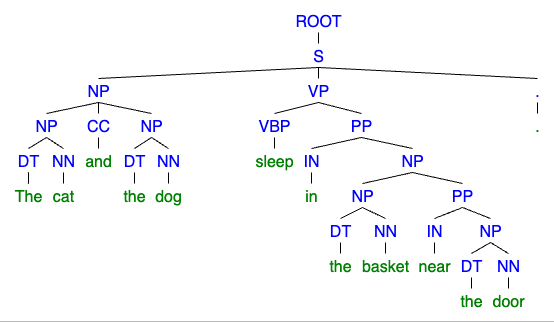

## Chunking with TextBlob
TextBlob is another NLP library, that has two noun phrases chunker implementations, textblob.np_extractors. <span style="color:blue">FastNPExtractor</span> (default, based on [Shlomi Babluki’s implementation](https://thetokenizer.com/2013/05/09/efficient-way-to-extract-the-main-topics-of-a-sentence/) and textblob.np_extractors. <span style="color:blue">ConllExtractor</span>, which uses the CoNLL 2000 corpus to train a tagger.

In [20]:
from textblob import TextBlob
#from textblob.np_extractors import FastNPExtractor
from textblob.np_extractors import ConllExtractor
extractor = ConllExtractor()
sentence ="Swayy is a beautiful new dashboard for discovering and curating online content."
parse = TextBlob(sentence, np_extractor=extractor)
print(parse.noun_phrases)

['swayy', 'beautiful new dashboard', 'online content']


## Named Entity Recognition
Named entities are definite noun phrases that refer to specific types of individuals, such as <span style="color:blue">organizations</span>, a <span style="color:blue">country</span>, <span style="color:blue">products</span>, <span style="color:blue">person</span>, <span style="color:blue">dates</span> and so on. 

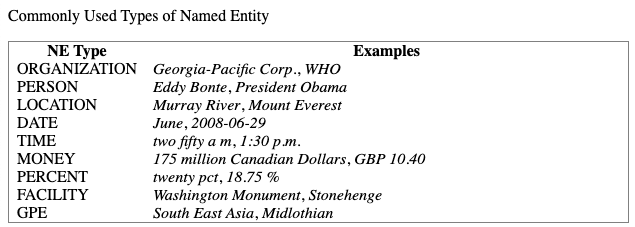

The goal of a named entity recognition (NER) system is to identify all textual mentions of the named entities. This can be broken down into two sub-tasks: identifying the boundaries of the NE, and identifying its type. This can be broken down into two sub-tasks: identifying the boundaries of the NE, and identifying its type.
NER is widely used in many NLP applications such as information extraction or question answering systems


### With Spacy
In spaCy the default trained pipelines can identify a variety of named and numeric entities, including companies, locations, organizations and products. 
Named entities are available as the <span style="color:blue">ents</span> property of a Doc

In [ ]:
import spacy
text = "Barack Obama was born in Hawaii. He was elected President of the United States in 2008."

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
for ent in doc.ents:
    print("{:20s}\t{:12s}\t{:6d}\t{:6d}".format(\
             ent.text, ent.label_, ent.start_char, ent.end_char))

# GPE --> Geopolitical entity, i.e. countries, cities, states.

Barack Obama        	PERSON      	     0	    12
Hawaii              	GPE         	    25	    31
the United States   	GPE         	    61	    78
2008                	DATE        	    82	    86


In [22]:
import spacy
text = "Barack Obama was born in Hawaii. He was elected President of the United States in 2008."

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
displacy.render(doc, style="ent")

### With Stanza

In Stanza, NER is performed by the NERProcessor and can be invoked by the name <span style="color:blue">ner</span>

In [23]:
import stanza
en_nlp = stanza.Pipeline(lang='en', processors='tokenize,ner', use_gpu=False, verbose=False)

text = "Barack Obama was born in Hawaii. He was elected President of the United States in 2008."
doc = en_nlp(text)
# print(*[f'entity: {ent.text}\ttype: {ent.type}' for ent in doc.ents], sep='\n')

for ent in doc.ents:
    print("{:20s}\t{:6s}\t{:6d}\t{:6d}".format(\
             ent.text, ent.type, ent.start_char, ent.end_char))

/Users/yimam/anaconda3/envs/nlpnweb/lib/python3.8/site-packages/stanza/models/ner/trainer.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filen

Barack Obama        	PERSON	     0	    12
Hawaii              	GPE   	    25	    31
the United States   	GPE   	    61	    78
2008                	DATE  	    82	    86


In [24]:
from stanza.utils.visualization.ner_visualization import visualize_strings

text = ["Barack Obama was born in Hawaii. He was elected President of the United States in 2008."] # must be a list


visualize_strings(text, "en", colors={"PERSON": "orange", "DATE": "red", "GPE": "green"})


### NLTK NE chunker
For NER in NLTK, you need to use the function <span style="color:blue">nltk.ne_chunk()</span>. If we set the parameter binary=True, then named entities are just tagged as NE; otherwise, the classifier adds category labels such as PERSON, ORGANIZATION, and GPE. <span style="color:blue">nltk.ne_chunk()</span> will load NLTK''s currently reccommended chunker (Maxent_NE_Chunker). You might need to download it separately.

In [25]:
!pip install svgling

In [26]:
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/yimam/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

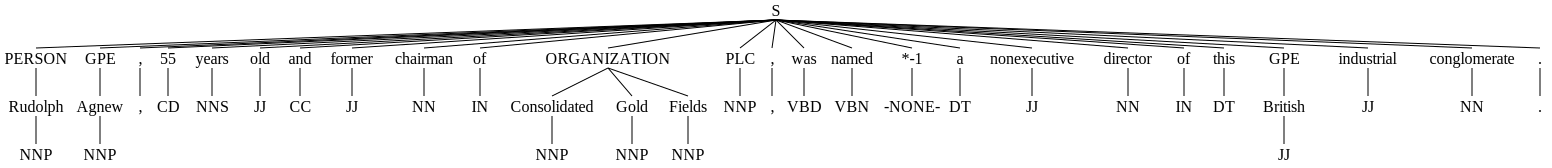

In [27]:
# treebank corpus is already tagged with POS
from nltk.corpus import treebank
from nltk.chunk import ne_chunk

ne_chunk(treebank.tagged_sents()[2])

In [ ]:
from pprint import pprint
pprint(ne_chunk(treebank.tagged_sents()[2]))

Tree('S', [Tree('PERSON', [('Rudolph', 'NNP')]), Tree('GPE', [('Agnew', 'NNP')]), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), Tree('ORGANIZATION', [('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP')]), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), Tree('GPE', [('British', 'JJ')]), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')])


For your own text, you need to tokenize and tag before doing chunking

In [29]:
from nltk.chunk import ne_chunk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
text = """
Barack Obama was born in Hawaii. He was elected President of the United States in 2008.
"""

sentences = sent_tokenize(text)
for sentence in sentences:
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    ne_tagged_words = ne_chunk(tagged_words)
    print (ne_tagged_words)

(S
  (PERSON Barack/NNP)
  (PERSON Obama/NNP)
  was/VBD
  born/VBN
  in/IN
  (GPE Hawaii/NNP)
  ./.)
(S
  He/PRP
  was/VBD
  elected/VBN
  President/NNP
  of/IN
  the/DT
  (GPE United/NNP States/NNPS)
  in/IN
  2008/CD
  ./.)
